## Importing Neccesary Libraries

In [109]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf

<br>

## Importing Dataset

In [2]:
# Don't forget to cut this down

data = pd.read_csv(".../Face data/age_gender1.csv")
data.head(10)

,age,ethnicity,gender,img_name,pixels
0,1,2,0,20161219203650636.jpg.chip.jpg,129 128 128 126 127 130 133 135 139 142 145 14...
1,1,2,0,20161219222752047.jpg.chip.jpg,164 74 111 168 169 171 175 182 184 188 193 199...
2,1,2,0,20161219222832191.jpg.chip.jpg,67 70 71 70 69 67 70 79 90 103 116 132 145 155...
3,1,2,0,20161220144911423.jpg.chip.jpg,193 197 198 200 199 200 202 203 204 205 208 21...
4,1,2,0,20161220144914327.jpg.chip.jpg,202 205 209 210 209 209 210 211 212 214 218 21...
5,1,2,0,20161220144957407.jpg.chip.jpg,195 198 200 200 198 198 199 199 198 197 197 19...
6,1,2,0,20161220145040127.jpg.chip.jpg,208 216 217 219 222 223 222 221 220 220 221 22...
7,1,2,0,20170109191125532.jpg.chip.jpg,99 142 169 177 179 181 183 186 187 186 191 190...
8,1,2,0,20161219222749039.jpg.chip.jpg,127 127 133 140 143 148 152 157 160 165 172 17...
9,1,2,0,20170109191209991.jpg.chip.jpg,199 211 211 214 216 216 219 221 222 224 219 21...


<br>

In [3]:
# Excluding img_name and Ethnicity

del data["img_name"]
del data["ethnicity"]

In [4]:
data.head()

,age,gender,pixels
0,1,0,129 128 128 126 127 130 133 135 139 142 145 14...
1,1,0,164 74 111 168 169 171 175 182 184 188 193 199...
2,1,0,67 70 71 70 69 67 70 79 90 103 116 132 145 155...
3,1,0,193 197 198 200 199 200 202 203 204 205 208 21...
4,1,0,202 205 209 210 209 209 210 211 212 214 218 21...


<br>

## Data Preprocessing

In [6]:
# Structure of the data
print("\n Shape: ")
print(data.shape)


 Shape: 
(23705, 3)


In [7]:
data.describe()

,age,gender
count,23705.000000,23705.000000
mean,33.300907,0.477283
std,19.885708,0.499494
min,1.000000,0.000000
25%,23.000000,0.000000
50%,29.000000,0.000000
75%,45.000000,1.000000
max,116.000000,1.000000


In [8]:
#Number of Null Values
print("\n Number of null values: ")
print(data.isnull().sum())


 Number of null values: 
age       0
gender    0
pixels    0
dtype: int64


In [7]:
# Splitting variables for easy process

Variables = ["age", "gender"]

main = data.drop("pixels", axis=1)
pix = data.drop(Variables, axis=1)

In [8]:
pix.head()

,pixels
0,129 128 128 126 127 130 133 135 139 142 145 14...
1,164 74 111 168 169 171 175 182 184 188 193 199...
2,67 70 71 70 69 67 70 79 90 103 116 132 145 155...
3,193 197 198 200 199 200 202 203 204 205 208 21...
4,202 205 209 210 209 209 210 211 212 214 218 21...


In [9]:
main.head()

,age,gender
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0


In [10]:
# No. of levels in a factor(Variable)
main.nunique()

age       104
gender      2
dtype: int64

In [99]:
# Discretizing data into intervals.
main["age"] = pd.cut(main["age"],bins=[0,3,18,45,64,116],labels=["0","1","2","3","4"])

<br>

## Data Visualization

Text(0.5, 1.0, 'Level count: Age')

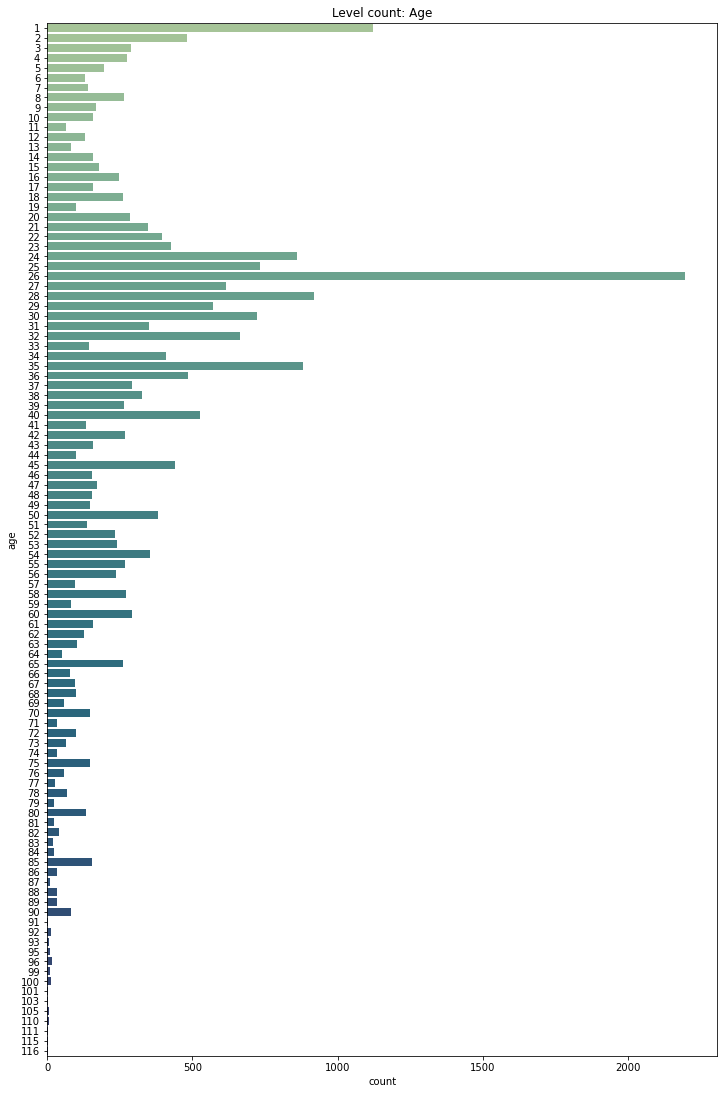

In [66]:
#Count Visual
plt.figure(figsize=(12,19))
g = sns.countplot(y= main["age"], palette="crest")
plt.title("Level count: Age")

C:\Users\ACER\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Level count: Gender')

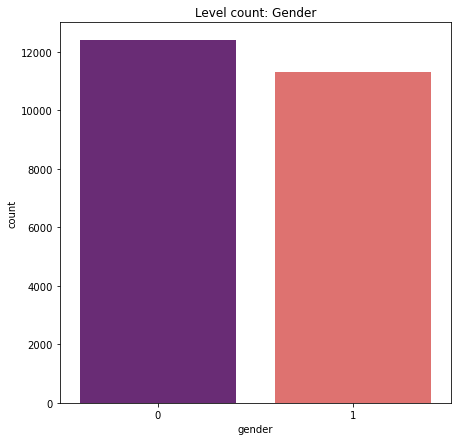

In [67]:
plt.figure(figsize=(7,7))
g = sns.countplot(main["gender"], palette="magma")
plt.title("Level count: Gender")

### Image Shape

In [11]:
num_pixels = len(pix['pixels'][0].split(" "))
img_height = int(np.sqrt(len(pix['pixels'][0].split(" "))))
img_width = int(np.sqrt(len(pix['pixels'][0].split(" "))))
print(num_pixels, img_height, img_width)

2304 48 48


### Resizing the data

In [12]:
pix = pd.Series(pix["pixels"])
pix = pix.apply(lambda x: x.split(' '))
pix = pix.apply(lambda x: np.array(list(map(lambda z:np.int64(z), x))))
pix = np.array(pix)
pix = np.stack(np.array(pix), axis=0)

# reshape data
pix = pix.reshape(-1, 48, 48, 1)
print("X shape: ", pix.shape)

X shape:  (23705, 48, 48, 1)


### Image Overview

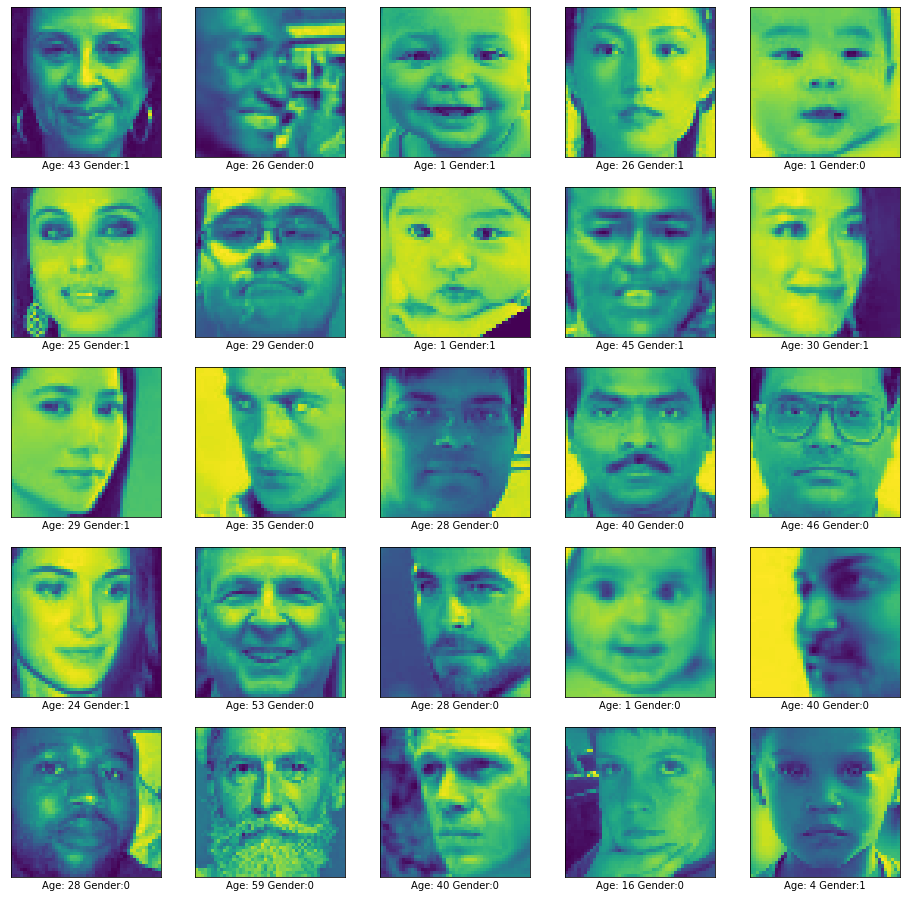

In [17]:
plt.figure(figsize=(16,16))
for i,j in zip(np.random.randint(0, 23705, 25), range(1,26)):
    plt.subplot(5,5,j)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(pix[i])
    plt.xlabel(
    "Age: "+str(main['age'].iloc[i])+" Gender:"+str(main['gender'].iloc[i]))
plt.show()

<br>

# Constructing Neural Networks for AGE and GENDER 

In [24]:
from sklearn.metrics import confusion_matrix
import itertools
import tensorflow as tf
import plotly.express as px
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import to_categorical # convert to one-hot-encoding
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D, BatchNormalization, InputLayer
from tensorflow.keras.optimizers import RMSprop,Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping
from tensorflow.keras.losses import BinaryCrossentropy, SparseCategoricalCrossentropy

### Categorizing target variables

In [100]:
age_mat = np.array(main['age'])
gender_mat = np.array(main['gender'])

age = to_categorical(age_mat, num_classes=5)
gender = to_categorical(main["gender"], num_classes = 2)
print(age, gender)

[[1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 ...
 [0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1.]] [[1. 0.]
 [1. 0.]
 [1. 0.]
 ...
 [0. 1.]
 [0. 1.]
 [0. 1.]]


In [71]:
pix = pix / 255
pix = pix / 255

### Image data Generator

In [72]:
datagen = ImageDataGenerator(
        featurewise_center = False,
    # set input mean to 0 over the dataset
       samplewise_center = False,
    # set each sample mean to 0 
       featurewise_std_normalization = False,
    # divide inputs by std of the dataset
       samplewise_std_normalization=False,  
    # divide each input by its std
       zca_whitening=False,
    # dimesion reduction
       rotation_range=5, 
    # randomly rotate images in the range 5 degrees
       zoom_range = 0.1,
    # Randomly zoom image 10%
       width_shift_range=0.1, 
    # randomly shift images horizontally 10%
       height_shift_range=0.1,  
    # randomly shift images vertically 10%
       horizontal_flip=False,  
    # randomly flip images
        vertical_flip=False  # randomly flip images
)

datagen.fit(pix)

### Training the model

In [101]:
from sklearn.model_selection import train_test_split

# Gender
x_train_gender, x_test_gender, y_train_gender, y_test_gender = train_test_split(pix, gender, test_size=0.30, random_state=42)

# Age
x_train_age, x_test_age, y_train_age, y_test_age = train_test_split(pix, age, test_size=0.30, random_state=42)

In [102]:
print(x_train_gender.shape, x_train_age.shape)

(16593, 48, 48, 1) (16593, 48, 48, 1)


### Crafting a CNN model

In [103]:
def img_model(num_classes, activation, loss):
    model = Sequential()
    model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', padding = "same", input_shape=(48,48,1)))
    model.add(BatchNormalization())
    model.add(MaxPool2D(pool_size=(2,2)))
    model.add(Dropout(0.2))
    model.add(Conv2D(64, kernel_size=(3,3),activation="relu",padding="same"))
    model.add(BatchNormalization())
    model.add(MaxPool2D(pool_size=(2,2)))
    model.add(Dropout(0.2))
    model.add(Conv2D(64, kernel_size=(3,3),activation="relu",padding="same"))
    model.add(BatchNormalization())
    model.add(MaxPool2D(pool_size=(2,2)))
    model.add(Dropout(0.2))
    model.add(Flatten())
    model.add(Dense(256,activation="relu"))
    model.add(Dense(num_classes, activation=activation))
    
    model.compile(optimizer='Adam',
              loss= loss,
              metrics=['accuracy'])
    return model

In [104]:
# Callbacks

early_stopping = EarlyStopping(patience=10, 
                               min_delta=0.001,
                               restore_best_weights=True)

learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy', 
                                           patience = 2,
                                           verbose=1,
                                           factor=0.5,
                                           min_lr = 0.00001)

<br>

<br>

## Age prediction

In [105]:
epochs = 500  # for better result increase the epochs
batch_size = 64

In [107]:
model_age = img_model(5,"softmax",'categorical_crossentropy')
history_age = model_age.fit(x_train_age, y_train_age, batch_size=batch_size,
                              epochs = epochs, validation_data = (x_test_age,y_test_age), 
                            steps_per_epoch= x_train_age.shape[0] // batch_size, 
                            callbacks= [early_stopping, 
                            learning_rate_reduction])

Epoch 1/500
259/259 [==============================] - 112s 370ms/step - loss: 0.9859 - accuracy: 0.6423 - val_loss: 3.2499 - val_accuracy: 0.0759 - lr: 0.0010
Epoch 2/500
259/259 [==============================] - 90s 348ms/step - loss: 0.7153 - accuracy: 0.7183 - val_loss: 3.0306 - val_accuracy: 0.0828 - lr: 0.0010
Epoch 3/500
259/259 [==============================] - 90s 348ms/step - loss: 0.6517 - accuracy: 0.7458 - val_loss: 11.1697 - val_accuracy: 0.5782 - lr: 0.0010
Epoch 4/500
259/259 [==============================] - 91s 350ms/step - loss: 0.6094 - accuracy: 0.7576 - val_loss: 21.9054 - val_accuracy: 0.0828 - lr: 0.0010
Epoch 5/500
259/259 [==============================] - ETA: 0s - loss: 0.5702 - accuracy: 0.7764
Epoch 5: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
259/259 [==============================] - 89s 343ms/step - loss: 0.5702 - accuracy: 0.7764 - val_loss: 6.2456 - val_accuracy: 0.5782 - lr: 0.0010
Epoch 6/500
259/259 [====================

## Age Model Performance 

In [108]:
fig = px.line(
    history_age.history, y=['loss', 'val_loss'],
    labels={'index': 'epoch', 'value': 'loss'}, 
    title='Training History')
fig.show()

In [110]:
loss, acc = model_age.evaluate(x_test_age, y_test_age, verbose=0)
print('Test loss: {}'.format(loss))
print('Test Accuracy: {}'.format(acc))

Test loss: 0.6105756163597107
Test Accuracy: 0.7630764842033386


<br>
<br>

## Gender prediction

In [111]:
model_gender = img_model(2, "sigmoid", "binary_crossentropy")
history_gender = model_gender.fit(x_train_gender, y_train_gender, 
                                 batch_size = batch_size,
                                 epochs = epochs,
                                 validation_data = (x_test_gender, y_test_gender),
                                 steps_per_epoch = x_train_gender.shape[0] // batch_size, callbacks=[early_stopping,learning_rate_reduction])


Epoch 1/500
259/259 [==============================] - 47s 147ms/step - loss: 0.4820 - accuracy: 0.7792 - val_loss: 1.3232 - val_accuracy: 0.4740 - lr: 0.0010
Epoch 2/500
259/259 [==============================] - 39s 153ms/step - loss: 0.3464 - accuracy: 0.8430 - val_loss: 0.8686 - val_accuracy: 0.5041 - lr: 0.0010
Epoch 3/500
259/259 [==============================] - 40s 155ms/step - loss: 0.3093 - accuracy: 0.8617 - val_loss: 0.9606 - val_accuracy: 0.5260 - lr: 0.0010
Epoch 4/500
259/259 [==============================] - 41s 157ms/step - loss: 0.2882 - accuracy: 0.8711 - val_loss: 0.3698 - val_accuracy: 0.8352 - lr: 0.0010
Epoch 5/500
259/259 [==============================] - 40s 156ms/step - loss: 0.2635 - accuracy: 0.8864 - val_loss: 0.4605 - val_accuracy: 0.7754 - lr: 0.0010
Epoch 6/500
259/259 [==============================] - ETA: 0s - loss: 0.2499 - accuracy: 0.8907
Epoch 6: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
259/259 [=======================

## Gender Model Performance  

In [119]:
fx = px.line(history_gender.history, y=["loss", "val_loss"],
    labels = {'index':'epoch', 'value':'loss'},
    title = 'Training History')

fx.show()

## Loss and accuracy

In [120]:
loss, acc = model_gender.evaluate(x_test_gender, y_test_gender, verbose=0)
print("Test loss: {}".format(loss))
print("Test Accuracy: {}".format(acc))

Test loss: 0.28052589297294617
Test Accuracy: 0.8892013430595398


## THE END!